In [9]:
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
plt.ion()


sim=fr.simulation(fname='/home/noah/Desktop/large_analysis/zeck_simulation/113Snaf.txt')
sim64=sim[pd.land(sim['detector']=='E',sim['pixel']==64)]

218.0 963 370.8 360
-3.94633507853 1823.30104712


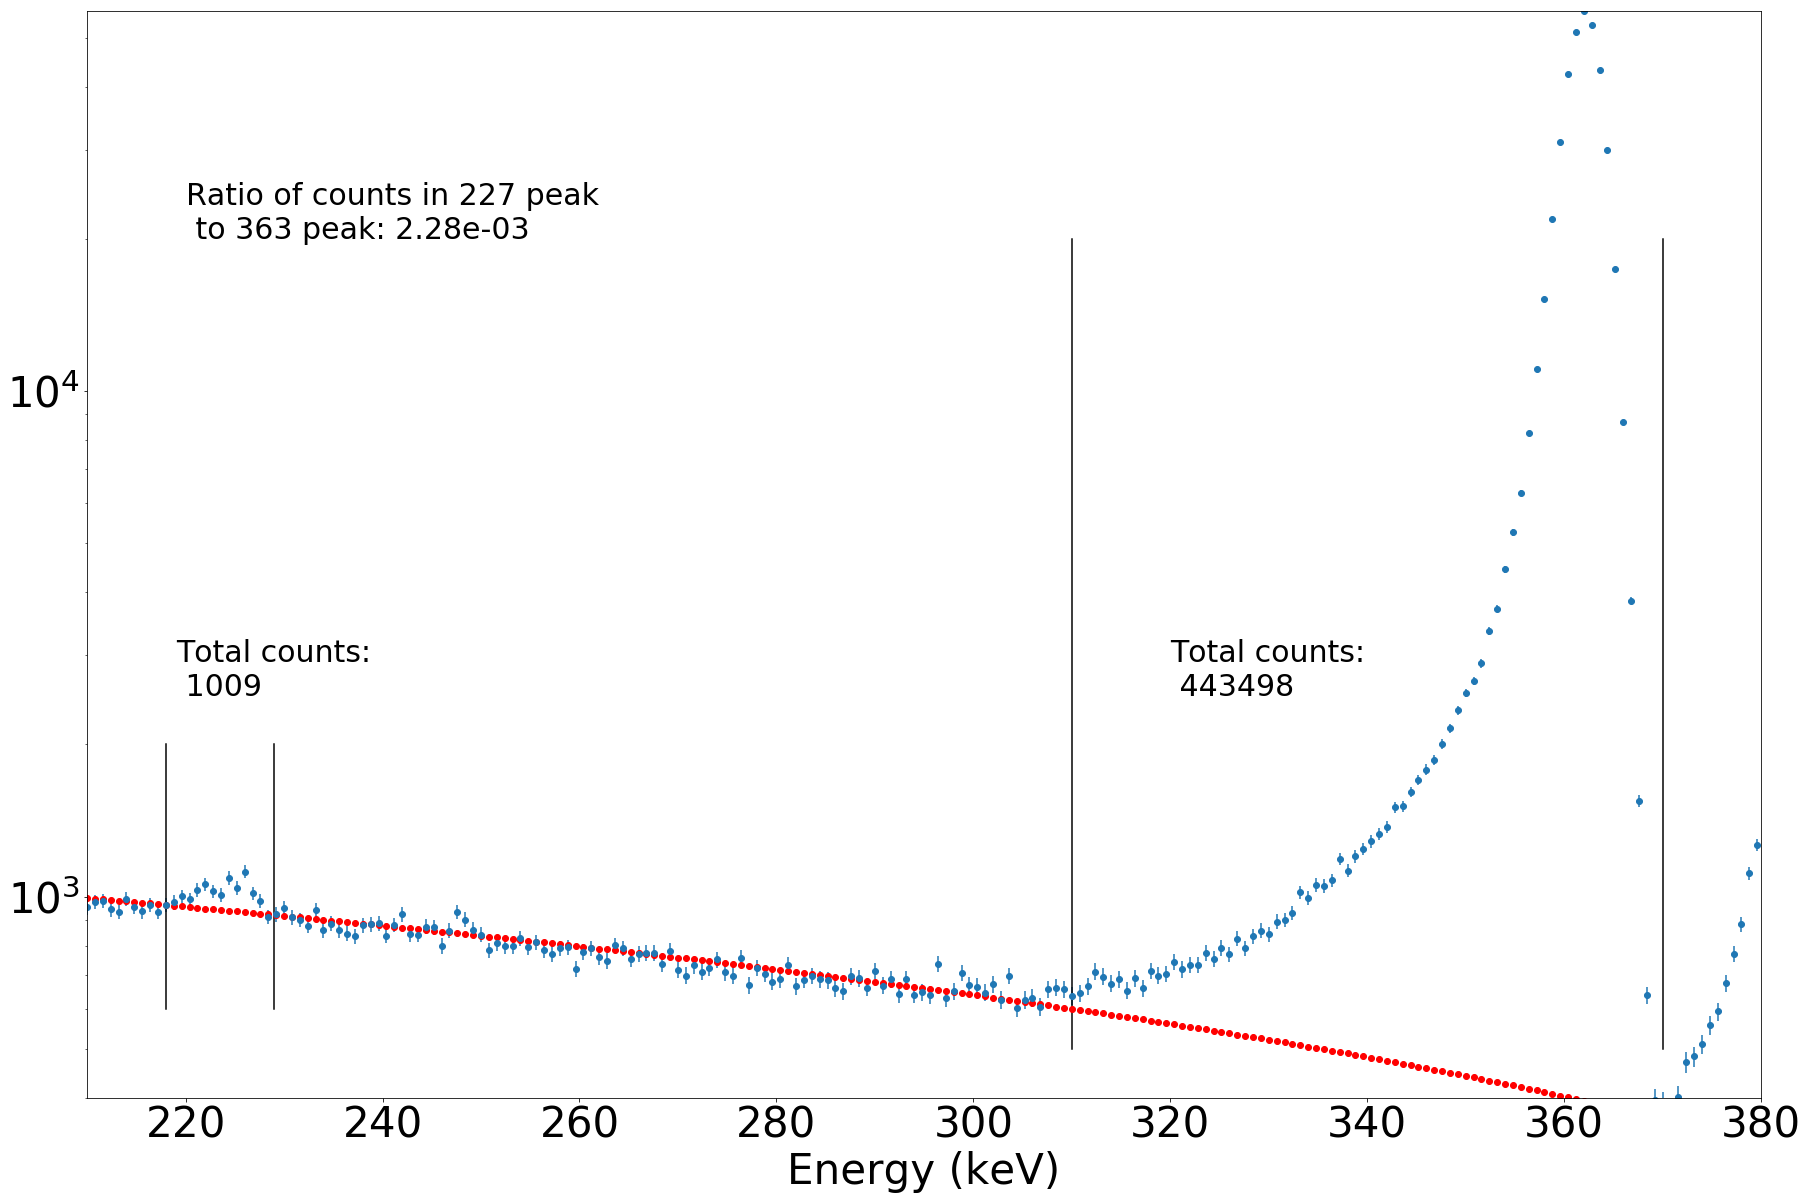

In [23]:
fs=42
hist,bins=np.histogram(sim64['energy'],bins=500,range=[0,400])
bins=pd.cbins(bins)
x1,y1,x2,y2=bins[bins==218][0],hist[bins==218][0],bins[np.sum(bins<=360)+np.argmin(hist[pd.land(bins>360,bins<380)])],np.min(hist[pd.land(bins>360,bins<380)])
print x1,y1,x2,y2
m=float(y1-y2)/float(x1-x2)
b= float(x1*y2-x2*y1)/(x1-x2)
print m,b
lilpeak=np.sum(hist[pd.land(bins>218,bins<229)]-m*bins[pd.land(bins>218,bins<229)]-b)
bigpeak=np.sum(hist[pd.land(bins>310,bins<370)]-m*bins[pd.land(bins>310,bins<370)]-b)
plt.figure(figsize=(30,20))
plt.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{113}$Sn simulation')
plt.plot((218,218),(600,2e3),'k-')
plt.plot((229,229),(600,2e3),'k-')
plt.plot((310,310),(500,2e4),'k-')
plt.plot((370,370),(500,2e4),'k-')
plt.plot(bins,m*bins+b,'ro')
plt.yscale('log')
plt.xlim(210,380)
plt.ylim(400,56574)
plt.tick_params(labelsize=fs)
plt.xlabel('Energy (keV)',fontsize=fs)
plt.text(219,2.5e3,'Total counts: \n %i' %(lilpeak), fontsize=30)
plt.text(320,2.5e3,'Total counts: \n %i' %(bigpeak), fontsize=30)
plt.text(220,2e4,'Ratio of counts in 227 peak \n to 363 peak: %1.2e' %(float(lilpeak)/bigpeak), fontsize=30)
plt.savefig('peak_count.png')
plt.show()